# Pattern Recognition Exercise

In [114]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Part 1: Data Cleaning and Preprocessing

In [115]:
# Read the Dataset
data = pd.read_csv('housing.csv')

In [116]:
# Print first 5 rows of the dataset
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [117]:
# Identify The Categorical And The Numerical Values Of The Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Based on the information above, we can conclude that every column in the dataset is numerical (float64), except of the last column, which is categorical (string).

In [118]:
# Normalize the dataset, in order for all data to be in the same scale

sc = StandardScaler() # instantiate a scaler's object

# Column "ocean_proximity" is not scaled because it contains categorical values
data_scaled = sc.fit_transform(data.drop("ocean_proximity",axis=1)) 

In [119]:
# print the scaled dataset
data_scaled = pd.DataFrame(data=data_scaled,columns=data.columns[0:-1])
data_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900


In [120]:
# One - Hot encoding of the only categorical attribute 'ocean_proximity'
vector = pd.get_dummies(data['ocean_proximity'])

In [121]:
# Adding the new columns to the dataset
data = pd.concat([data_scaled,vector], axis=1)

In [122]:
# print new dataset (which is scaled and one-hot encoded)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900,0,0,0,1,0


In [123]:
# Subtitute the NaN values with the median-value of the column (in our case only for the column "total_bedrooms")
data.fillna(data.median(), inplace=True)

Now, the numerical attributes of the dataset are scaled and the categorical ones are One-Hot encoded. Also, all null values have been replaced with the Median value of each column.

In [124]:
# Delete outliers from the dataset using the IQR method
for x in data.columns[0:9]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [125]:
# Delete null values
data.dropna(inplace=True)

In [126]:
# Reindex the dataframe after deletion of rows
data.reset_index(drop=True, inplace=True)

### Part 2: Visualization

<AxesSubplot:xlabel='longitude', ylabel='Count'>

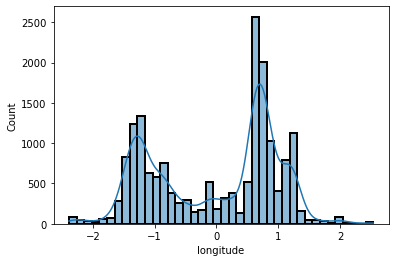

In [127]:
# Histogram of column 'longitude'
sns.histplot(data[data.columns[0]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='latitude', ylabel='Count'>

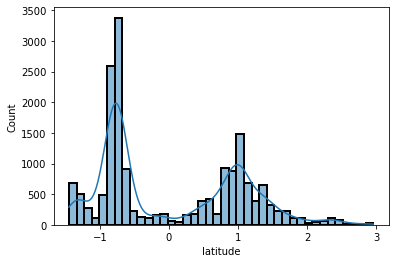

In [128]:
# Histogram of column 'latitude'
sns.histplot(data[data.columns[1]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

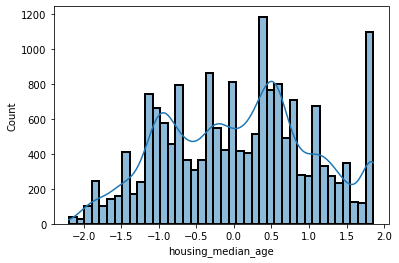

In [129]:
# Histogram of column 'housing_median_age'
sns.histplot(data[data.columns[2]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='total_rooms', ylabel='Count'>

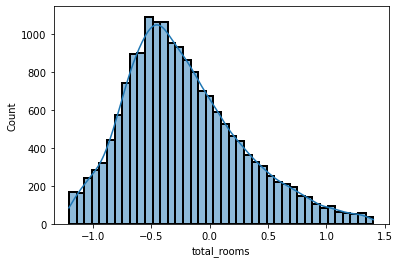

In [130]:
# Histogram of column 'total_rooms'
sns.histplot(data[data.columns[3]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='total_bedrooms', ylabel='Count'>

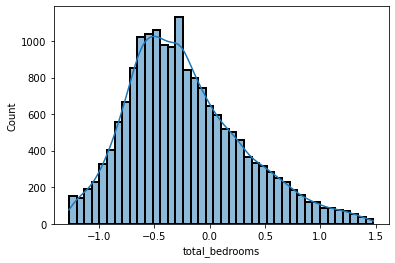

In [131]:
# Histogram of column 'total_bedrooms'
sns.histplot(data[data.columns[4]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='population', ylabel='Count'>

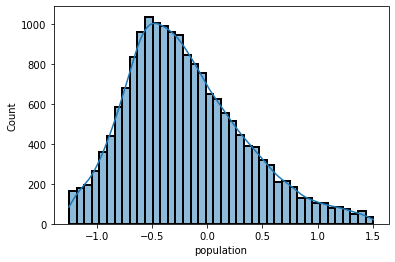

In [132]:
# Histogram of column 'population'
sns.histplot(data[data.columns[5]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='households', ylabel='Count'>

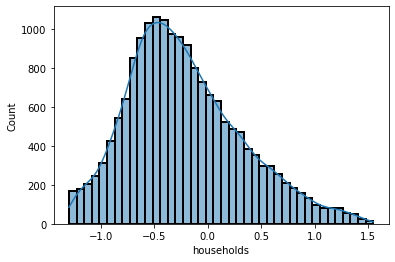

In [133]:
# Histogram of column 'households'
sns.histplot(data[data.columns[6]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='median_income', ylabel='Count'>

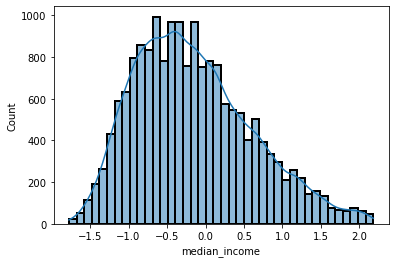

In [134]:
# Histogram of column 'median_income'
sns.histplot(data[data.columns[7]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

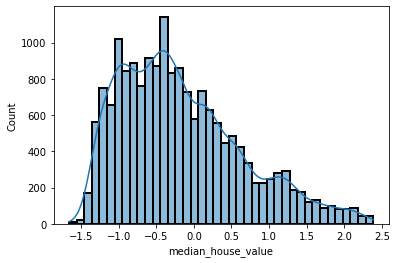

In [135]:
# Histogram of column 'median_house_value'
sns.histplot(data[data.columns[8]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='<1H OCEAN', ylabel='Count'>

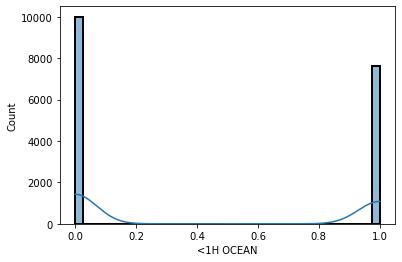

In [136]:
# Histogram of column '<1H OCEAN'
sns.histplot(data[data.columns[9]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='INLAND', ylabel='Count'>

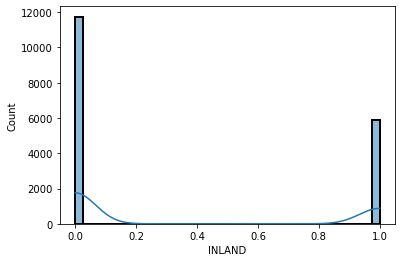

In [137]:
# Histogram of column 'INLAND'
sns.histplot(data[data.columns[10]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='ISLAND', ylabel='Count'>

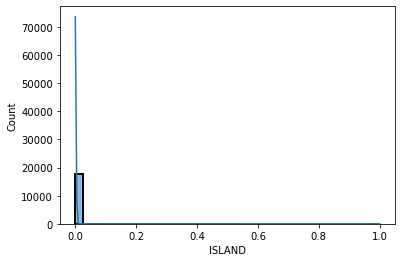

In [138]:
# Histogram of column 'ISLAND'
sns.histplot(data[data.columns[11]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='NEAR BAY', ylabel='Count'>

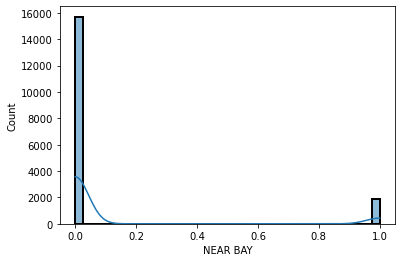

In [139]:
# Histogram of column 'NEAR BAY'
sns.histplot(data[data.columns[12]],bins=40,kde=True,lw=2)

<AxesSubplot:xlabel='NEAR OCEAN', ylabel='Count'>

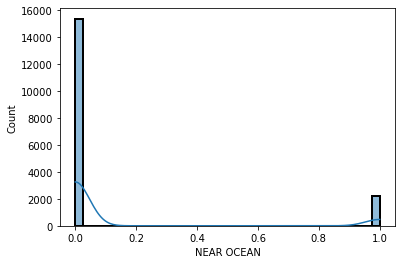

In [140]:
# Histogram of column 'NEAR OCEAN'
sns.histplot(data[data.columns[13]],bins=40,kde=True,lw=2)

<AxesSubplot:>

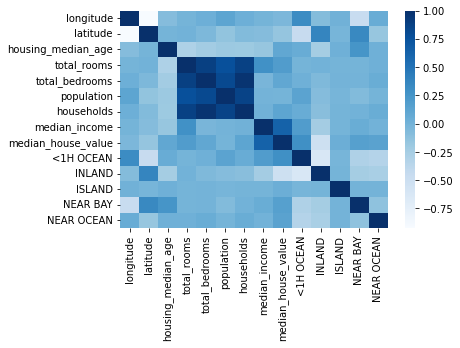

In [141]:
# Generate correlation's matrix heatmap
sns.heatmap(data=data.corr(),cmap='Blues')

#### Visualizations of pairs of varriables

<AxesSubplot:xlabel='total_rooms', ylabel='total_bedrooms'>

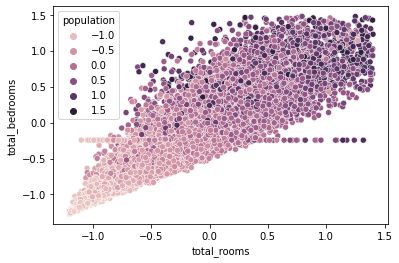

In [142]:
# Visualise in one graph the total rooms of a house vs the total bedrooms vs the population
sns.scatterplot(x=data['total_rooms'],y=data['total_bedrooms'],hue=data['population'])

<AxesSubplot:xlabel='population', ylabel='households'>

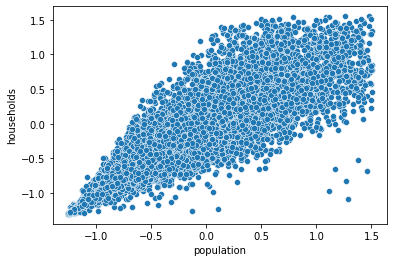

In [143]:
# Visualise in one graph the population of a house vs the households
sns.scatterplot(x=data['population'],y=data['households'])

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

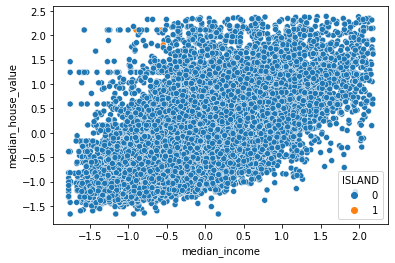

In [144]:
# Visualization of median income vs the median house value. Then, show which houses are located on an island and which are not.
sns.scatterplot(x=data['median_income'],y=data['median_house_value'],hue=data['ISLAND'])

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

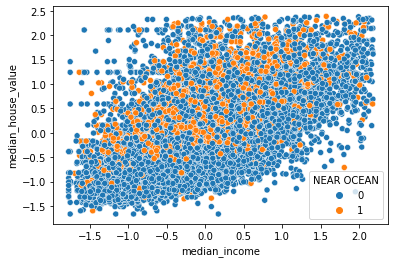

In [145]:
# Show how median income is distributed vs median house value. Then, show which houses are near the ocean.
sns.scatterplot(x=data['median_income'],y=data['median_house_value'],hue=data['NEAR OCEAN'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

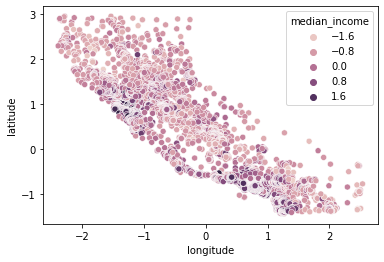

In [146]:
# Show in one graph the relation of longitude, latitude and median income
sns.scatterplot(x=data['longitude'],y=data['latitude'],hue=data['median_income'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

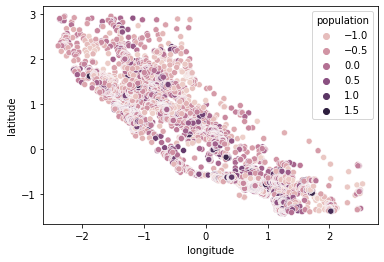

In [147]:
# Show in one graph the relation of longitude, latitude and population
sns.scatterplot(x=data['longitude'],y=data['latitude'],hue=data['population'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

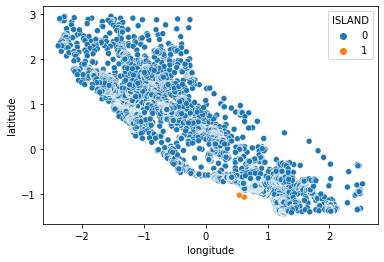

In [148]:
# Show in one graph the relation of longitude and latitude. Then, show in the same graph which houses are located on an island and which are not.
sns.scatterplot(x=data['longitude'],y=data['latitude'],hue=data['ISLAND'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

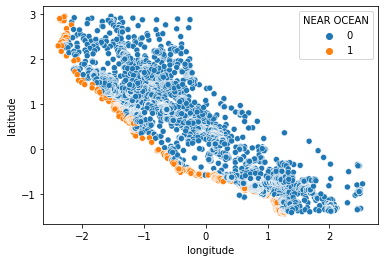

In [149]:
# Show in one graph the relation of longitude and latitude. Then, show in the same graph which houses are located near the ocean.
sns.scatterplot(x=data['longitude'],y=data['latitude'],hue=data['NEAR OCEAN'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

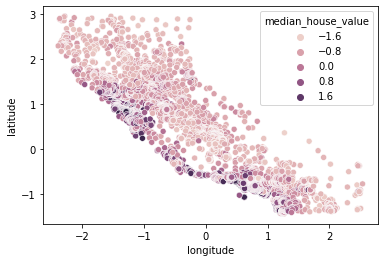

In [150]:
# Show how much does houses cost along each area of Callifornia.
sns.scatterplot(x=data['longitude'],y=data['latitude'],hue=data['median_house_value'])

### Part 3: Machine Learning 

In [151]:
# Divide the data in Labels set (X) and Feature set (y)
X = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY','NEAR OCEAN']]
y = data['median_house_value']

In [155]:
# Print X set
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,0,0,0,1,0
1,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,0,0,0,1,0
2,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.786942,-0.770978,-0.894071,-0.801787,0.087447,0,0,0,1,0
4,-1.337818,1.033821,1.856182,-0.046188,-0.115979,-0.292712,0.037823,-0.111366,0,0,0,1,0


In [ ]:
# Print y set
y.head()

0    1.258693
1    1.165100
2    1.172900
3    0.544611
4    0.800259
Name: median_house_value, dtype: float64

In [ ]:
# Import Necessary Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [ ]:
# split the dataset in test and train test as Linear Regression is a supervised machine learning algorithm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# define cross-validation with K = 10 folds
cv = KFold(n_splits=10, shuffle=True)

#### Linear Regression - Least Squares Algorithm 

##### Training Time

In [ ]:
# choose linear regression as our model
model = LinearRegression()

In [ ]:
# Use 10-fold cross validation to evaluate model
scores = cross_validate(model, X_train, y_train, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error'),cv=cv, n_jobs=-1)

In [ ]:
# Print the Mean Squared Errors during training time
scores['test_neg_mean_squared_error']

array([-0.2596215 , -0.25331877, -0.23956903, -0.24223972, -0.27913122,
       -0.23800785, -0.25121351, -0.24903176, -0.2484025 , -0.25102513])

In [ ]:
np.mean(scores['test_neg_mean_squared_error'])

-0.25115609892437096

In [ ]:
# Print the Mean Absolute Errors during training time
scores['test_neg_mean_absolute_error']

array([-0.38279826, -0.37450095, -0.3589365 , -0.36069789, -0.38925918,
       -0.3634198 , -0.37746047, -0.37424115, -0.37347036, -0.37672539])

In [ ]:
np.mean(scores['test_neg_mean_absolute_error'])

-0.3731509969881939

In [ ]:
# Train the Linear Regression model
model.fit(X_train, y_train)

LinearRegression()

##### Test time

In [ ]:
# now its time to make predictions on unseen data
predictions = model.predict(X_test)

<AxesSubplot:xlabel='median_house_value'>

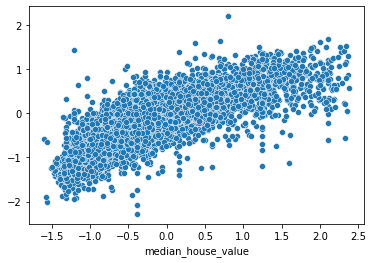

In [ ]:
# print in one plot the actual y values vs the predicted ones
sns.scatterplot(x=y_test,y=predictions)

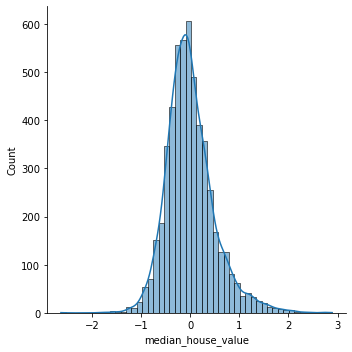

In [ ]:
# show how the residuals (actual_y - predicted_y) are distributed
sns.displot(y_test-predictions,bins=50,kde=True)

##### We can see that the residuals (errors) are highly normally distributed. This is a good sign, which tells us that the Linear Regression Model was a good choice to use on this data. 

In [ ]:
print('Mean Absolute Error after on testing:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error on testing:', metrics.mean_squared_error(y_test, predictions))

Mean Absolute Error after on testing: 0.36944267045203516
Mean Squared Error on testing: 0.2463934529594516


#### Non-Linear Regression Learning with Neural Network

In [164]:
# import necessary libraries
from keras.initializers import VarianceScaling
from keras.models import Sequential
from keras.layers import Dense

In [230]:
# Define a Deep Learning Model
model = Sequential()
model.add(Dense(26, input_dim=13, activation='relu'))
model.add(Dense(52, activation='relu'))
model.add(Dense(104, activation='relu'))
model.add(Dense(1,activation='linear'))

# Compile the Model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Train the Model
model.fit(X_train,y_train, epochs=25, batch_size=25, verbose = 1)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=1)
print(scores * 100)


Epoch 1/25
494/494 - 5s - loss: 0.3667 - 5s/epoch - 10ms/step
Epoch 2/25
494/494 - 2s - loss: 0.3218 - 2s/epoch - 4ms/step
Epoch 3/25
494/494 - 2s - loss: 0.3096 - 2s/epoch - 3ms/step
Epoch 4/25
494/494 - 2s - loss: 0.3043 - 2s/epoch - 4ms/step
Epoch 5/25
494/494 - 3s - loss: 0.2986 - 3s/epoch - 5ms/step
Epoch 6/25
494/494 - 2s - loss: 0.2962 - 2s/epoch - 4ms/step
Epoch 7/25
494/494 - 2s - loss: 0.2903 - 2s/epoch - 4ms/step
Epoch 8/25
494/494 - 2s - loss: 0.2873 - 2s/epoch - 3ms/step
Epoch 9/25
494/494 - 2s - loss: 0.2837 - 2s/epoch - 3ms/step
Epoch 10/25
494/494 - 2s - loss: 0.2801 - 2s/epoch - 3ms/step
Epoch 11/25
494/494 - 2s - loss: 0.2796 - 2s/epoch - 4ms/step
Epoch 12/25
494/494 - 2s - loss: 0.2773 - 2s/epoch - 4ms/step
Epoch 13/25
494/494 - 3s - loss: 0.2763 - 3s/epoch - 6ms/step
Epoch 14/25
494/494 - 2s - loss: 0.2734 - 2s/epoch - 4ms/step
Epoch 15/25
494/494 - 3s - loss: 0.2717 - 3s/epoch - 5ms/step
Epoch 16/25
494/494 - 2s - loss: 0.2711 - 2s/epoch - 5ms/step
Epoch 17/25
494/